# Języki skryptowe - Python
## Wykład 6

---

* przestrzenie nazw
* moduły

## Nazwy zmiennych

---

In [1]:
zmienna = 10 # zmienna wskazuje na int

print(zmienna)

zmienna = "Hello World!" # zmienna wskazuje na str

print(zmienna)

def funkcja():
    print("Jestem funkcją.")
    
zmienna = funkcja # zmienna wskazuje na funkcje

zmienna()

10
Hello World!
Jestem funkcją.


## Niebezpieczne nadpisania

---

In [2]:
def moja_nazwa(): # moja_nazwa wskazuje na funkcję
    print("Jestem funkcją.")
    
def moja_nazwa(): # moja_nazwa wskazuje inną funkcję
    print("Jestem nową funkcją.")
    
moja_nazwa()

Jestem nową funkcją.


In [3]:
moja_nazwa = 10 # moja_nazwa wskazuje na int 

moja_nazwa() # TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

## Moduły - *import* ...

---

In [4]:
import math

def sin(x):
    """Zwraca x."""
    return x

In [5]:
math.sin(math.pi / 2) # wywołanie [moduł].[funkcja]

1.0

In [6]:
sin(math.pi / 2) # wywołanie [funkcja]

1.5707963267948966

## Moduły - *from ... import ...*

---

In [7]:
from math import sin

def sin(x): # nadpisuje sin z math
    """Zwraca x."""
    return x

sin(math.pi / 2) # wywołanie funkcji sin

1.5707963267948966

In [8]:
def sin(x):
    """Zwraca x."""
    return x

from math import sin # nadpisuje sin

sin(math.pi / 2) # wywołanie math.sin

1.0

## Przestrzenie nazw

---

* abstrakcyjna przestrzeń przechowująca nazwy
* np. przestrzeń nazw wbudowanych

In [9]:
print(dir(__builtin__)[-72:])

['abs', 'all', 'any', 'ascii', 'bin', 'bool', 'bytearray', 'bytes', 'callable', 'chr', 'classmethod', 'compile', 'complex', 'copyright', 'credits', 'delattr', 'dict', 'dir', 'divmod', 'dreload', 'enumerate', 'eval', 'exec', 'filter', 'float', 'format', 'frozenset', 'get_ipython', 'getattr', 'globals', 'hasattr', 'hash', 'help', 'hex', 'id', 'input', 'int', 'isinstance', 'issubclass', 'iter', 'len', 'license', 'list', 'locals', 'map', 'max', 'memoryview', 'min', 'next', 'object', 'oct', 'open', 'ord', 'pow', 'print', 'property', 'range', 'repr', 'reversed', 'round', 'set', 'setattr', 'slice', 'sorted', 'staticmethod', 'str', 'sum', 'super', 'tuple', 'type', 'vars', 'zip']


## Uwaga: nadpisać można wszystko

---

In [10]:
slownik = dict(x=1, y=2)

print(slownik)

{'y': 2, 'x': 1}


In [11]:
def dict(x, y): # nazwy wbudowane też można nadpisać
    return x, y

slownik = dict(x=1, y=2)

print(slownik)

(1, 2)


In [12]:
# usuń zmienne sesji jupyter
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Przestrzeń nazw lokalnych

---

* zmienne zdefiniowane wewnątrz funkcji (niedostępne poza nią)

In [13]:
def funkcja():             # zmienne lokalne dostępne
    zmienna_lokalna = 1    # są tylko wewnątrz funkcji
    return zmienna_lokalna # w której zostały zdefiniowane

print("zmienna_lokalna =", zmienna_lokalna)

NameError: name 'zmienna_lokalna' is not defined

## Przestrzeń nazw globalnych

---

* dostępne w całym module (pliku)

In [14]:
zmienna_globalna = "Python"

def funkcja():
    return zmienna_globalna

# wewnątrz funkcji zmienne globalne są dostępne
funkcja()

'Python'

## Zmienne lokalne nadpisują globalne

---

In [15]:
zmienna_globalna = "Python"

def funkcja():
    zmienna_globalna = "Nowy Python" # lokalna zmienna_globalna
    print("in funkcja:", zmienna_globalna)

funkcja()

print("outside funkcja:", zmienna_globalna) # globalna bez zmian

in funkcja: Nowy Python
outside funkcja: Python


## Albo *global* albo *local*

---

In [16]:
zmienna_globalna = "Python"

def funkcja():
    print("in funkcja:", zmienna_globalna) # globalna?
    zmienna_globalna = "Nowy Python"
    print("in funkcja:", zmienna_globalna) # lokalna?

funkcja() # UnboundLocalError: local variable 'zmienna_globalna'
          # referenced before assignment

UnboundLocalError: local variable 'zmienna_globalna' referenced before assignment

## Kolejność przestrzeni

---

* nazwy lokalne, potem globalne, na końcu wbudowane

In [17]:
list = tuple # zmienna globalna nadpisuje wbudowane list
dict = float # zmienna globalna nadpisuje wbudowane dict

print("type(list()) =", type(list()))
print("type(dict()) =", type(dict()))

def funkcja():
    dict = int # zmienna lokalna nadpisuje globalne dict
    print("In funkcja:")
    print("\ttype(dict()) =", type(dict())) # lokalna
    print("\ttype(list()) =", type(list())) # globalna
    print("\ttype(int()) =", type(int()))   # wbudowana

funkcja()

type(list()) = <class 'tuple'>
type(dict()) = <class 'float'>
In funkcja:
	type(dict()) = <class 'int'>
	type(list()) = <class 'tuple'>
	type(int()) = <class 'int'>


In [18]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Wielokrotne zagnieżdżenie

---

In [19]:
a = "global a" # zasięg zmiennych a, b, c
b = "global b" # jest globalny
c = "global c"

def funkcja():
    a = "local a" # lokalne a, b dostępne w funkcji
    b = "local b" # i w każdym kolejnym zagnieżdzeniu
    
    def funkcja_w_funkcji():
        a = "local local a" # dostępna tylko w funkcja_w_funkcji
        print(a, b, c, sep='\n')
    
    funkcja_w_funkcji()
    
funkcja() # od "najlokalniejszej" do "najglobalniejszej"

local local a
local b
global c


## Uwaga na globalne mutowalne

---

In [20]:
x = [1, 2, 3]
y = ['a', 'b', 'c']

def funkcja():
    x = [1, 2, 3, 4] # przypisanie -> zmienna lokalna
    y.append('d')    # modyfikacja -> ciągle globalna
    
funkcja()

print(x, y, sep='\n')

[1, 2, 3]
['a', 'b', 'c', 'd']


## Wymuszanie zmiennej globalnej

---

In [21]:
zmienna = "globalna"

def f():
    global zmienna # przypisanie nie tworzy zmiennej lokalnej
    zmienna = "nowa globalna" # ale modyfikuje globalną
    
f()

print(zmienna)

nowa globalna


## Wymuszanie zmiennej "nielokalnej"

---

In [22]:
a = "global a" # globalna

def f():
    a = "local a" # lokalna w f
    
    def g():
        a = "local local a" # lokalna w g
        print("in g():", a)
        
    g()
        
    print("in f():", a)

f()

print("outside:", a)

in g(): local local a
in f(): local a
outside: global a


## Wymuszanie zmiennej "nielokalnej"

---

In [23]:
a = "global a" # globalna

def f():
    a = "local a" # lokalna w f
    
    def g():
        global a # używaj globalnej
        a = "local local a" # modyfikuje globalną
        print("in g():", a)
        
    g()
        
    print("in f():", a)

f()

print("outside:", a)

in g(): local local a
in f(): local a
outside: local local a


## Wymuszanie zmiennej "nielokalnej"

---

In [24]:
a = "global a" # globalna

def f():
    a = "local a" # lokalna w f
    
    def g():
        nonlocal a # użyj a z poprzedniego zagnieżdżenia
        a = "local local a" # modyfikuje a z f
        print("in g():", a)
        
    g()
        
    print("in f():", a)

f()

print("outside:", a)

in g(): local local a
in f(): local local a
outside: global a


## Uwaga dla programistów C/C++

---

In [25]:
def funkcja(flag=True):
    if flag:   # zmienna zdefiniowana w bloku
        x = 10 # jest dostępna poza tym blokiem
    else:
        x = 20
        
    print(x)

In [26]:
funkcja() 

10


In [27]:
funkcja(False)

20


## Zasięg

---

* obszar dostępności danej przestrzeni nazw

In [28]:
import math
from math import cos

a = 1 # zasięg -> cały plik

def f():
    # uwaga: zaleca się wszystkie importy robić na początku
    from math import log # zasięg log(...) -> funkcja
    b = 2 # zasięg -> funkcja
    c = log(3) 
    
d = math.sin(4) # sin(...) poza zasięgiem [moduł].[funkcja]
e = cos(5)      # zasięg cos(...) -> cały plik
# f = log(6)    # NameError: name 'log' is not defined

## Własny moduł

---

In [29]:
%%writefile my_module.py
"""To jest mój pierwszy moduł."""

zmienna_globalna = "Unikaj zmiennych globalnych!"

def moja_funkcja():
    """Drukuje zmienną globalną."""
    print(zmienna_globalna)
    
def inna_funkcja(word="", n=0):
    """Drukuje word n razy."""
    print(word * n)

Overwriting my_module.py


## Importowanie własnego modułu

---

In [30]:
import my_module

my_module.zmienna_globalna

'Unikaj zmiennych globalnych!'

In [31]:
my_module.moja_funkcja()

Unikaj zmiennych globalnych!


In [32]:
my_module.inna_funkcja("-", 10)

----------


## Dokumentacja modułu

---

In [33]:
import my_module

help(my_module)

Help on module my_module:

NAME
    my_module - To jest mój pierwszy moduł.

FUNCTIONS
    inna_funkcja(word='', n=0)
        Drukuje word n razy.
    
    moja_funkcja()
        Drukuje zmienną globalną.

DATA
    zmienna_globalna = 'Unikaj zmiennych globalnych!'

FILE
    /doc/insync/scratch/zajęcia/2016/języki skryptowe - python/js-python/my_module.py




## Zawartość modułu

---

In [34]:
import my_module

dir(my_module)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'inna_funkcja',
 'moja_funkcja',
 'zmienna_globalna']

## *doc*, *file*, *name*, *package*

---

In [35]:
print(my_module.__doc__) # dokumentacja modułu

To jest mój pierwszy moduł.


In [36]:
print(my_module.__file__) # ścieżka do pliku źródłowego

/doc/insync/scratch/zajęcia/2016/języki skryptowe - python/js-python/my_module.py


In [37]:
print(my_module.__name__)  # nazwa modułu

my_module


In [38]:
print(my_module.__package__) # paczka to zbiór modułów

## *loader*, *spec*, *cached*

---

In [39]:
# informacja o "loaderze", który został wykorzystany
# do zaimportowania modułu    
print(my_module.__loader__)

In [40]:
print(my_module.__spec__) # ustalane w momencie importowanie modułu

ModuleSpec(name='my_module', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7f134aded6a0>, origin='/doc/insync/scratch/zajęcia/2016/języki skryptowe - python/js-python/my_module.py')


In [41]:
print(my_module.__cached__) # ścieżka do pliku .pyc

/doc/insync/scratch/zajęcia/2016/języki skryptowe - python/js-python/__pycache__/my_module.cpython-35.pyc


## Plik *pyc*

---

* plik *pyc* jest wynikiem kompilacji skryptu *py* do kodu bajtowego
* przyp. kod masyznowy -> zrozumiały dla procesora
* kod bajtowy -> zrozumiały dla maszyny wirtualnej / interpretera

## Kompilowany czy interpretowany?

---

* uwaga: implementacja języka (a nie język sam w sobie) może być kompilowany lub interpretowany

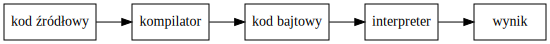

In [42]:
from graphviz import Source

Source('digraph "interpreter" { rankdir=LR; node [shape="box", width=1]; \
        "kod źródłowy" -> "kompilator" -> "kod bajtowy" -> "interpreter" -> "wynik"}')

## Skrypt jako "zbior definicji"

---

In [43]:
%%writefile my_module.py
"""To jest mój pierwszy moduł."""

zmienna_globalna = "Unikaj zmiennych globalnych!"

def moja_funkcja():
    """Drukuje zmienną globalną."""
    print(zmienna_globalna)
    
def inna_funkcja(word="", n=0):
    """Drukuje word n razy."""
    print(word * n)

Overwriting my_module.py


In [44]:
%run my_module.py

## Skrypt wykonujący operacje

---

In [45]:
%%writefile my_module.py
"""To jest mój pierwszy moduł."""

zmienna_globalna = "Unikaj zmiennych globalnych!"

def moja_funkcja():
    """Drukuje zmienną globalną."""
    print(zmienna_globalna)
    
def inna_funkcja(word="", n=0):
    """Drukuje word n razy."""
    print(word * n)
    
inna_funkcja('-', 10)
moja_funkcja()
inna_funkcja('-', 10)

Overwriting my_module.py


In [46]:
%run my_module.py

----------
Unikaj zmiennych globalnych!
----------


## Wykonywanie podczas importowania

---

```
Python 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> import my_module
----------
Unikaj zmiennych globalnych!
----------
>>> 
```

## "Funkcja *main*"

---

In [47]:
%%writefile my_module.py
"""To jest mój pierwszy moduł."""

zmienna_globalna = "Unikaj zmiennych globalnych!"

def moja_funkcja():
    """Drukuje zmienną globalną."""
    print(zmienna_globalna)
    
def inna_funkcja(word="", n=0):
    """Drukuje word n razy."""
    print(word * n)

if __name__ == "__main__":
    inna_funkcja('-', 10)
    moja_funkcja()
    inna_funkcja('-', 10)

Overwriting my_module.py


In [48]:
%run my_module.py

----------
Unikaj zmiennych globalnych!
----------


## Importowanie a *main*

---

* instrukcje w *main* nie zostaną wykonane podczas importowania (bo `__name__` = nazwa modułu)

```
Python 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> import my_module
>>> 
```

## Prywatność

---

In [49]:
%%writefile private.py

public = "public"
# _ przed nazwą -> from ... import * pomija
_internal = "internal use"

Overwriting private.py


In [50]:
from private import * # importuj wszystko 

In [51]:
public

'public'

In [52]:
_internal

NameError: name '_internal' is not defined

## Gdzie interpreter szuka modułów?

---

1. bieżący katalog
2. w katalogach określonych w zmiennej środowiskowej `PYTHONPATH`
3. w katalogach określonych w trakcie instalacji (np. `/usr/lib/python`)
4. w katalogach określonych w zmiennej `sys.path`

## Zmienne środowiskowe

---

* zmienne powłoki systemowej

```bash
goran@goran-ift:~$ export MOJA_ZMIENNA="wartość mojej zmiennej"
goran@goran-ift:~$ echo $MOJA_ZMIENNA 
wartość mojej zmiennej
```

* część zmiennych jest inicjowana przy starcie powłoki, np

```bash
goran@goran-ift:~$ echo $PATH
/home/goran/soft/anaconda3/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin
```

## Zmienne środowiskowe

---

* zmienne można aktualizować

```bash
goran@goran-ift:~$ export PATH=/newpath/:$PATH
goran@goran-ift:~$ echo $PATH
/newpath/:/home/goran/soft/anaconda3/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin
```

## *sys.path*

---

In [53]:
import sys

sys.path

['',
 '/home/goran/soft/anaconda3/lib/python35.zip',
 '/home/goran/soft/anaconda3/lib/python3.5',
 '/home/goran/soft/anaconda3/lib/python3.5/plat-linux',
 '/home/goran/soft/anaconda3/lib/python3.5/lib-dynload',
 '/home/goran/soft/anaconda3/lib/python3.5/site-packages',
 '/home/goran/soft/anaconda3/lib/python3.5/site-packages/Sphinx-1.4.6-py3.5.egg',
 '/home/goran/soft/anaconda3/lib/python3.5/site-packages/setuptools-27.2.0-py3.5.egg',
 '/home/goran/soft/anaconda3/lib/python3.5/site-packages/IPython/extensions',
 '/home/goran/.ipython']

## *sys.path*

---

In [54]:
sys.path.append("/moja/sciezka/do/modulow")

sys.path

['',
 '/home/goran/soft/anaconda3/lib/python35.zip',
 '/home/goran/soft/anaconda3/lib/python3.5',
 '/home/goran/soft/anaconda3/lib/python3.5/plat-linux',
 '/home/goran/soft/anaconda3/lib/python3.5/lib-dynload',
 '/home/goran/soft/anaconda3/lib/python3.5/site-packages',
 '/home/goran/soft/anaconda3/lib/python3.5/site-packages/Sphinx-1.4.6-py3.5.egg',
 '/home/goran/soft/anaconda3/lib/python3.5/site-packages/setuptools-27.2.0-py3.5.egg',
 '/home/goran/soft/anaconda3/lib/python3.5/site-packages/IPython/extensions',
 '/home/goran/.ipython',
 '/moja/sciezka/do/modulow']

## Moduł poza katalogiem roboczym

---

In [55]:
%%writefile /home/goran/trojmian.py
"""Moduł do obsługi trómianu kwadratowego."""

from math import sqrt

def _delta(a, b, c):
    """Liczy wyróżnik trójmianu."""
    return b**2 - 4*a*c

def _solve(a, b, d):
    """Liczy miejsca zerowe."""
    d = sqrt(d)
    return (-b + d) / 2 / a, (-b - d) / 2 / a

def solution(a, b, c):
    """Zwraca miejsca zerowe."""
    d = _delta(a, b, c)
    
    if d < 0:return None
    elif d == 0: return -b / 2 / a
    else: return _solve(a, b, d) 

Overwriting /home/goran/trojmian.py


## Moduł poza katalogiem roboczym

---

In [56]:
# nie ma w katalogu roboczym ani w PYTHONPATH itd
import trojmian

ImportError: No module named 'trojmian'

In [57]:
import sys
sys.path.append("/home/goran/") # dodajemy ścieżkę do sys.path
import trojmian # teraz działa

## Trójmian w akcji

---

In [58]:
help(trojmian) # nie ma _delta, ale jest sqrt!

Help on module trojmian:

NAME
    trojmian - Moduł do obsługi trómianu kwadratowego.

FUNCTIONS
    solution(a, b, c)
        Zwraca miejsca zerowe.
    
    sqrt(...)
        sqrt(x)
        
        Return the square root of x.

FILE
    /home/goran/trojmian.py




## Trójmian w akcji

---

In [59]:
from trojmian import * # importuj wszystko

In [60]:
solution(1, 2, 1) # dostęp do solution

-1.0

In [61]:
sqrt(4) # dostęp do sqrt z math!

2.0

In [62]:
_delta(1, 2, 1) # ale _delta nie została zaimportowana

NameError: name '_delta' is not defined

## Paczka

---

* uporządkowany zbiór modułów

```
package_name/     # top-level
    __init__.py   # wymagane (może być puste)
    subpackage1/
        __init__.py
        module1.py
        module2.py
        ...
    subpackage2/
        __init__.py
        ...
``` 

## __init__.py

---

In [63]:
%%writefile listy_zadan/__init__.py
"""Inicjalizacja paczki listy_zadan"""
import math # można np. importować moduły

Overwriting listy_zadan/__init__.py


## Lista 4

---

In [64]:
%%writefile listy_zadan/lista4/__init__.py
"""Inicjalizacja podpaczki lista4"""

Overwriting listy_zadan/lista4/__init__.py


## Lista 4 - zadanie 2

---

In [65]:
%%writefile listy_zadan/lista4/zad2.py
"""Napisz funkcję, która znajduje mniejszą liczbę z dwóch podanych."""

def min2(a, b):
    """Zwraca mniejszą z dwóch podanych liczb."""
    if a > b:
        return b
    return a

Overwriting listy_zadan/lista4/zad2.py


## Lista 4 - zadanie 3

---

In [66]:
%%writefile listy_zadan/lista4/zad3.py
"""Napisz funkcję, która z podanych liczb (ilość dowolna) znajduje najmniejszą."""

from listy_zadan.lista4.zad2 import min2

def min(*a):
    """Zwraca najmniejszą z podanych liczb."""
    current_min = a[0]
    
    for x in a:
        current_min = min2(current_min, x)
    
    return current_min

Overwriting listy_zadan/lista4/zad3.py


## Importowanie

---

In [67]:
import listy_zadan.lista4.zad2
import listy_zadan.lista4.zad3 as zad3

print("Zad2 =", listy_zadan.lista4.zad2.min2(1, 5))
print("Zad3 =", zad3.min(6, 2, 6, 3, 5))

Zad2 = 1
Zad3 = 2


In [68]:
# css prezentacji


from IPython.display import display, HTML

s = """

<style>

.rendered_html code {
  font-size: 75%;
}

</style>

"""

display(HTML(s))